# Lab 3

In [104]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, dendrogram
import seaborn as sns
from sklearn.datasets import load_iris


# Załadowanie danych

In [105]:
# Wczytanie danych
iris = load_iris()
X = iris.data
y = iris.target


# PCA i wizualizacja skupień

[0.72962445 0.22850762]


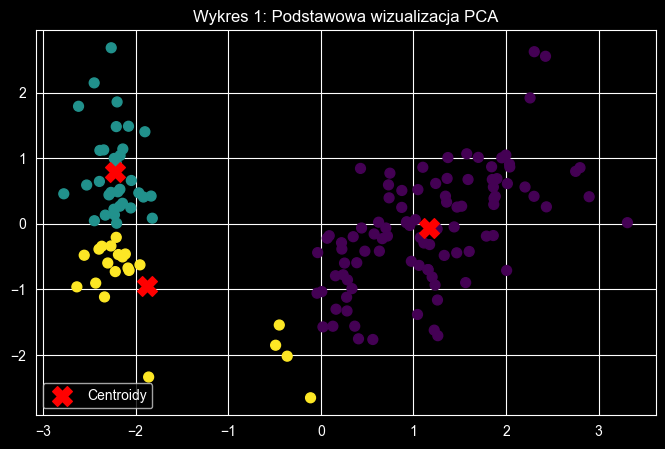

In [106]:
# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print(pca.explained_variance_ratio_)

# Klasteryzacja k-means (na potrzeby wizualizacji)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_pca)
centroids = kmeans.cluster_centers_

# Wizualizacja wynikow
# --- WYKRES 1:
plt.figure(figsize=(8, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroidy')
plt.title('Wykres 1: Podstawowa wizualizacja PCA')
plt.legend()
plt.show()

# # --- WYKRES 2:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels,
#                 palette='viridis', s=70, edgecolor='w', alpha=0.8)
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             c='red', marker='X', s=250, label='Centroidy', edgecolor='black')
# plt.title(f'Wykres 2: Detaliczna klasteryzacja (k=3)\nSilhouette: {score_pca:.4f}')
# plt.legend(title="Klastry")
# plt.show()


In [107]:
# A. Klasteryzacja na pełnym zbiorze X
kmeans_full = KMeans(n_clusters=3, random_state=42, n_init=10).fit(data_scaled)
score_full = silhouette_score(data_scaled, kmeans_full.labels_)

# B. Klasteryzacja na danych po PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10).fit(data_pca)
score_pca = silhouette_score(data_pca, kmeans_pca.labels_)

print(f"Silhouette Score (Pełne dane): {score_full:.4f}")
print(f"Silhouette Score (Po PCA): {score_pca:.4f}")



Silhouette Score (Pełne dane): 0.4599
Silhouette Score (Po PCA): 0.5092


# Klasteryzacja k-means

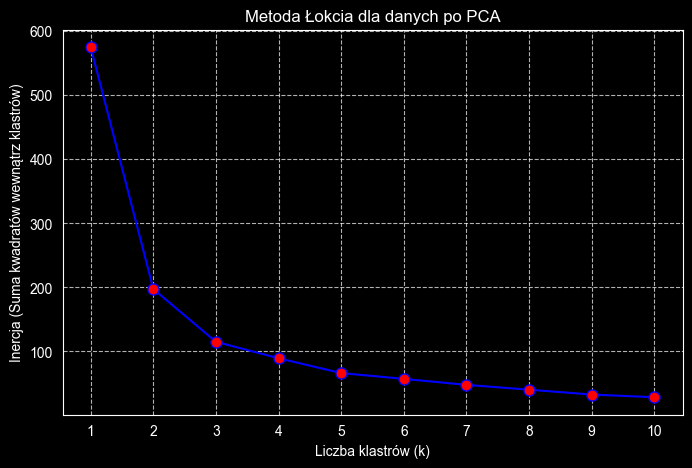

In [108]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Wizualizacja metody łokcia
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markerfacecolor='red', markersize=8)
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inercja (Suma kwadratów wewnątrz klastrów)')
plt.title('Metoda Łokcia dla danych po PCA')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Klasteryzacja hierarchiczna po PCA

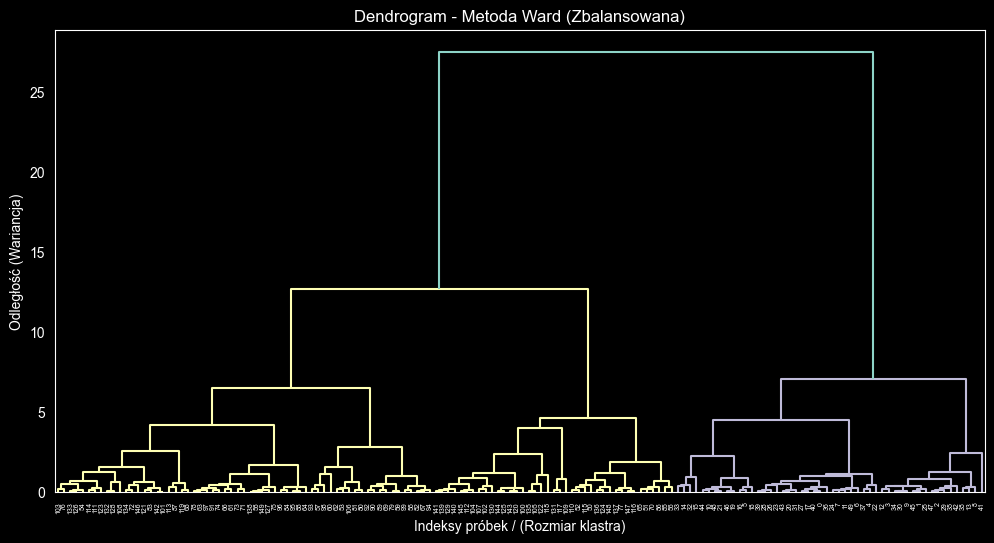

In [109]:
# Klasteryzacja metodą Ward
linked_ward = linkage(data_pca, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked_ward, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Metoda Ward (Zbalansowana)')
plt.xlabel('Indeksy próbek / (Rozmiar klastra)')
plt.ylabel('Odległość (Wariancja)')
plt.gca().grid(False)
plt.show()



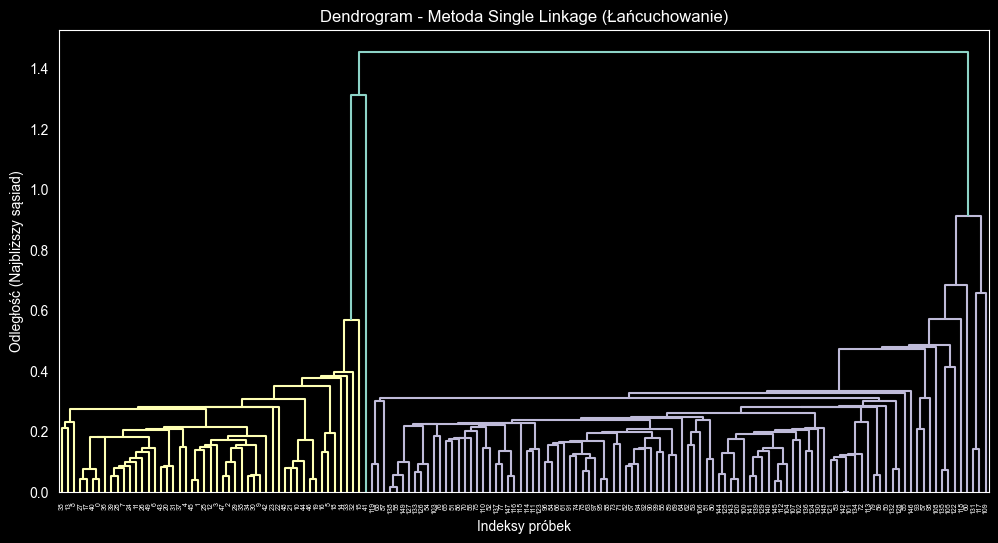

In [110]:
# Klasteryzacja metodą Single
linked_single = linkage(data_pca, method='single')

plt.figure(figsize=(12, 6))
dendrogram(linked_single, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Metoda Single Linkage (Łańcuchowanie)')
plt.xlabel('Indeksy próbek')
plt.ylabel('Odległość (Najbliższy sąsiad)')
plt.gca().grid(False)
plt.show()

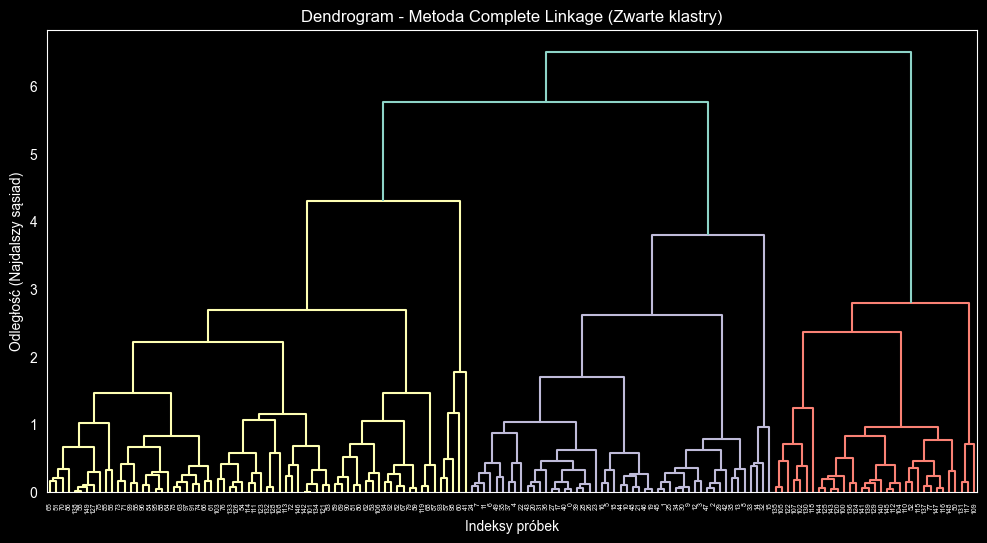

In [111]:
# Klasteryzacja metodą Complete
linked_complete = linkage(data_pca, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(linked_complete, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Metoda Complete Linkage (Zwarte klastry)')
plt.xlabel('Indeksy próbek')
plt.ylabel('Odległość (Najdalszy sąsiad)')
plt.gca().grid(False)
plt.show()

Do porównania z k-means

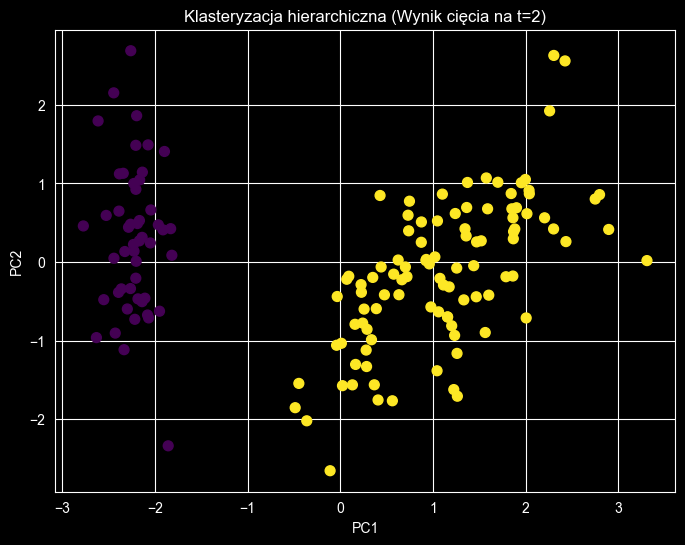

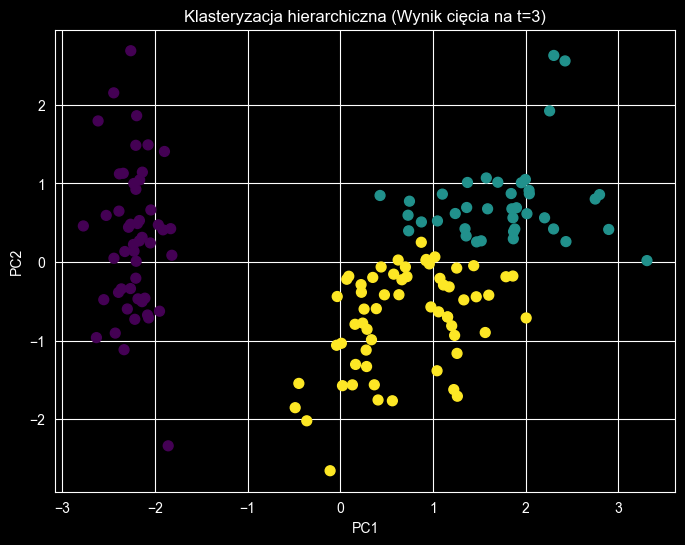

In [112]:
clusters_ward = fcluster(linked_ward, t=2, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_ward, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna (Wynik cięcia na t=2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

clusters_ward = fcluster(linked_ward, t=3, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_ward, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna (Wynik cięcia na t=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Klasteryzacja hierarchiczna przed PCA

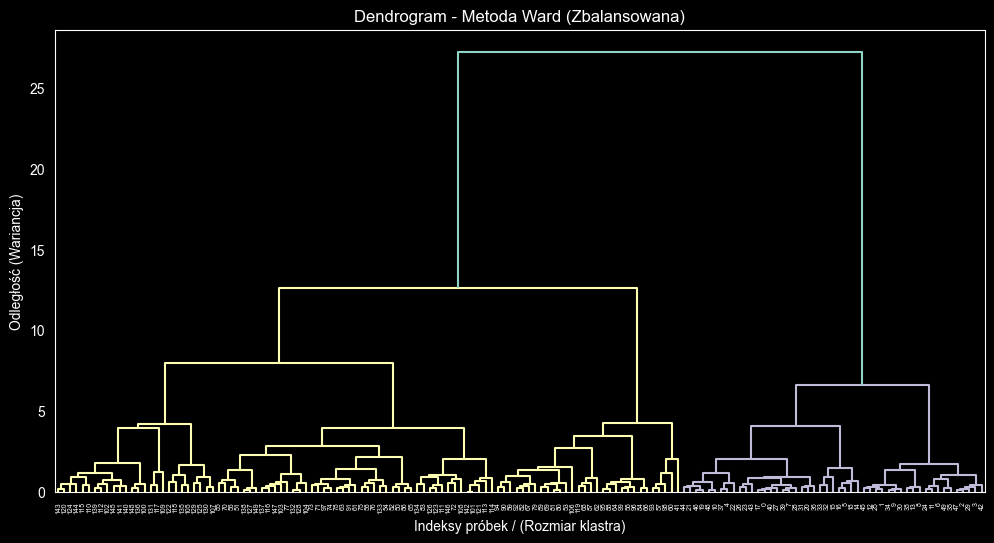

In [113]:
# Klasteryzacja metodą Ward
linked_ward_sc = linkage(data_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked_ward_sc, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Metoda Ward (Zbalansowana)')
plt.xlabel('Indeksy próbek / (Rozmiar klastra)')
plt.ylabel('Odległość (Wariancja)')
plt.gca().grid(False)
plt.show()

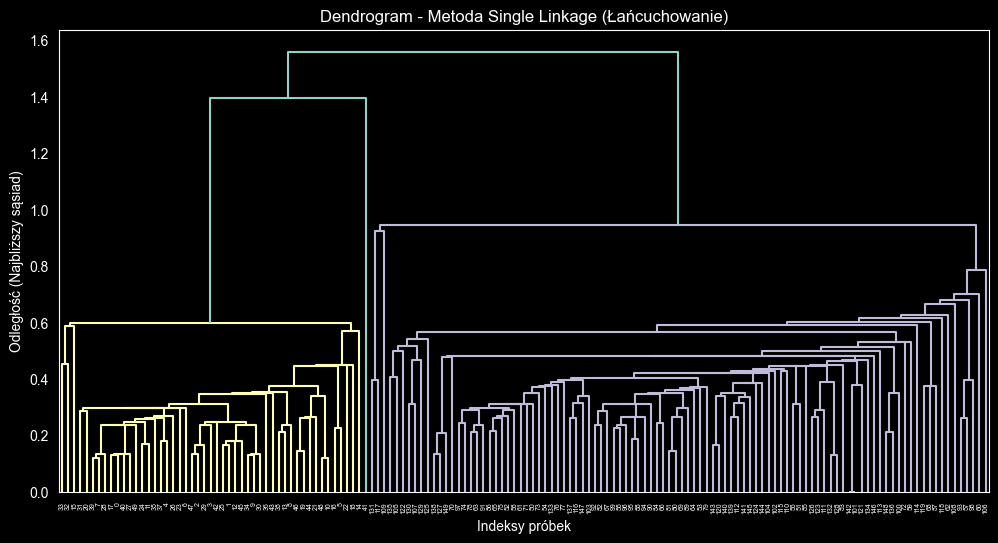

In [114]:
# Klasteryzacja metodą Single
linked_single_sc = linkage(data_scaled, method='single')

plt.figure(figsize=(12, 6))
dendrogram(linked_single_sc, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Metoda Single Linkage (Łańcuchowanie)')
plt.xlabel('Indeksy próbek')
plt.ylabel('Odległość (Najbliższy sąsiad)')
plt.gca().grid(False)
plt.show()

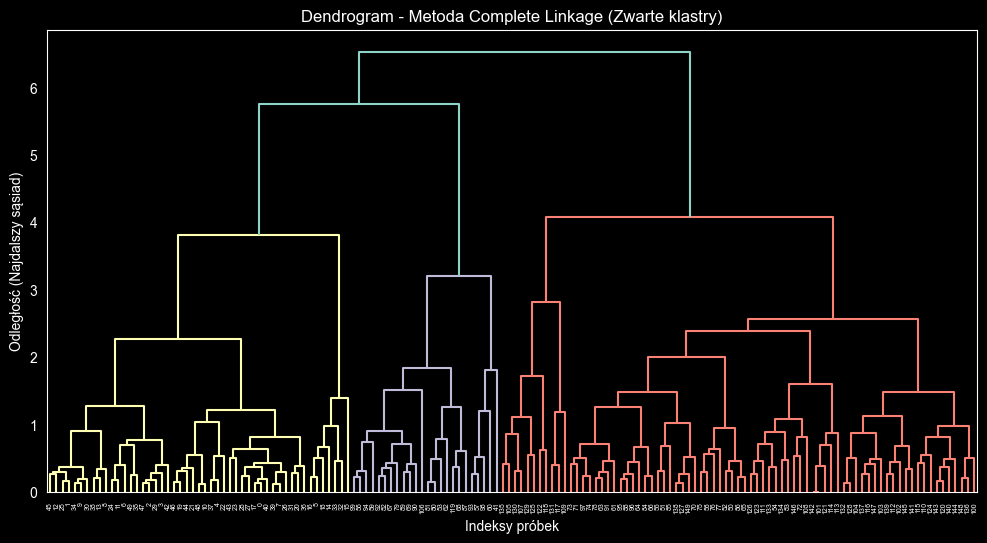

In [115]:
# Klasteryzacja metodą Complete
linked_complete_sc = linkage(data_scaled, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(linked_complete_sc, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Metoda Complete Linkage (Zwarte klastry)')
plt.xlabel('Indeksy próbek')
plt.ylabel('Odległość (Najdalszy sąsiad)')
plt.gca().grid(False)
plt.show()

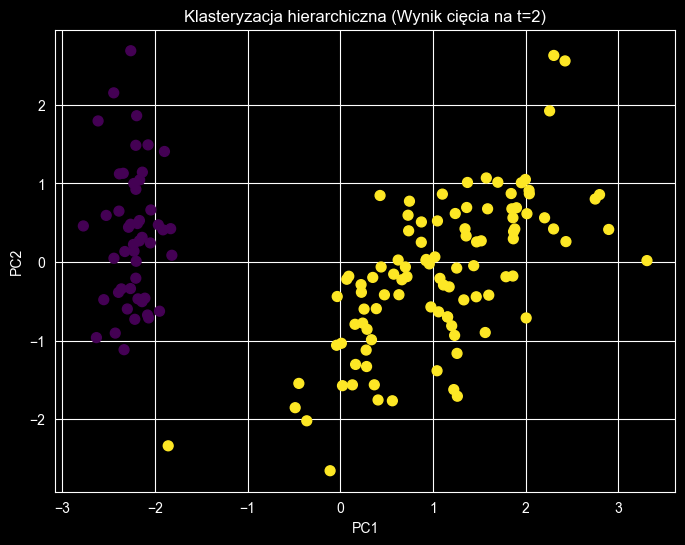

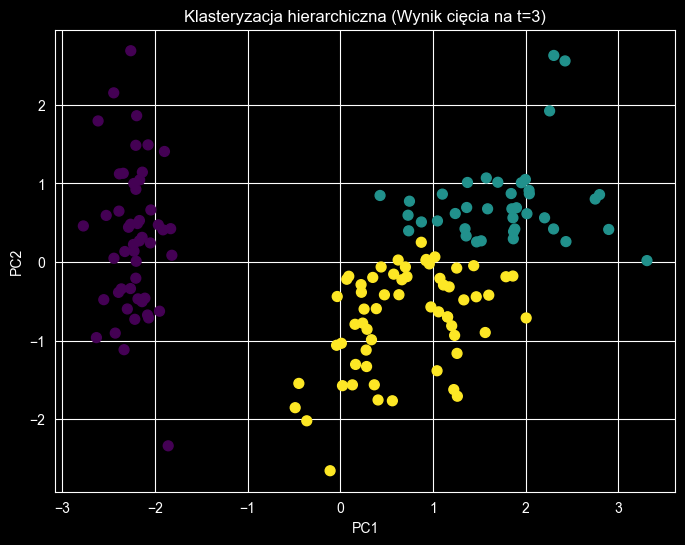

In [116]:
clusters_ward = fcluster(linked_ward_sc, t=2, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_ward, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna (Wynik cięcia na t=2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

clusters_ward = fcluster(linked_ward, t=3, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_ward, cmap='viridis', s=50)
plt.title('Klasteryzacja hierarchiczna (Wynik cięcia na t=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()